In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

import keras
from keras.models import Model
from keras.layers import Conv2D, MaxPool2D, ZeroPadding2D, \
                         UpSampling2D, Input, Dense, Activation, Flatten, Reshape
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
ds = pd.read_csv('C:/Users/vikas/Desktop/mljan19dwk/Datasets/mnist/train.csv').values

In [3]:
X_train , X_test , Y_train , Y_test = train_test_split(ds[: , 1:] , ds[: , 0] , test_size=0.25)
print(X_train.shape , X_test.shape , Y_train.shape , Y_test.shape)

(31500, 784) (10500, 784) (31500,) (10500,)


In [4]:
X_train  , X_test = X_train.reshape((-1,28,28,1)) , X_test.reshape((-1,28,28,1))
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
print(X_train.shape , X_test.shape , Y_train.shape , Y_test.shape)

(31500, 28, 28, 1) (10500, 28, 28, 1) (31500, 10) (10500, 10)


## Convolutional Auto_Encoder

In [22]:
e = 256

inp = Input((28,28,1))
conv1 = Conv2D(32, (3,3) , activation='relu')(inp)
conv2 = Conv2D(16 , (3,3) ,activation='relu')(conv1)
mp = MaxPool2D(2,2)(conv2)
conv3 = Conv2D(8, (3,3) ,activation='relu')(mp)
f1 = Flatten()(conv3)
d1 = Dense(256 , activation='relu')(f1)
emb = Dense(800 , activation='relu')(d1)
r1 = Reshape((10,10,8))(emb)
zp1 = ZeroPadding2D((1,1))(r1)
d_conv1 = Conv2D(16 , (3,3) , padding='same' , activation='relu')(zp1)
up1 = UpSampling2D((2,2))(d_conv1)
zp2 = ZeroPadding2D((1,1))(up1)
d_conv2 = Conv2D(32,(3,3) , padding='same' , activation='relu')(zp2)
zp3 = ZeroPadding2D((1,1))(d_conv2)
out = Conv2D(1 , (3,3) ,padding='same' , activation='relu')(zp3)

Convolutional_AE = Model(inputs = inp , outputs = out)
Convolutional_AE.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 16)        4624      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 10, 10, 8)         1160      
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               205056    
__________

In [23]:
Convolutional_AE.compile(loss='mse' , optimizer='adam' , metrics=['accuracy'])

In [24]:
hist = Convolutional_AE.fit(X_train , X_train,
                    shuffle=True,
                    epochs=30,
                    batch_size=512,
                    validation_data=(X_test,X_test))

Train on 31500 samples, validate on 10500 samples
Epoch 1/30
31500/31500 [==============================] - 7s 230us/step - loss: 3373.5802 - acc: 0.3417 - val_loss: 1557.1165 - val_acc: 0.6850
Epoch 2/30
31500/31500 [==============================] - 5s 156us/step - loss: 1083.0543 - acc: 0.7335 - val_loss: 802.0100 - val_acc: 0.7616
Epoch 3/30
31500/31500 [==============================] - 5s 156us/step - loss: 703.1912 - acc: 0.7671 - val_loss: 608.7905 - val_acc: 0.7737
Epoch 4/30
31500/31500 [==============================] - 5s 157us/step - loss: 570.8864 - acc: 0.7784 - val_loss: 511.9172 - val_acc: 0.7838
Epoch 5/30
31500/31500 [==============================] - 5s 157us/step - loss: 484.3023 - acc: 0.7851 - val_loss: 453.4923 - val_acc: 0.7879
Epoch 6/30
31500/31500 [==============================] - 5s 158us/step - loss: 434.7825 - acc: 0.7888 - val_loss: 421.7381 - val_acc: 0.7899
Epoch 7/30
31500/31500 [==============================] - 5s 158us/step - loss: 399.7823 - acc:

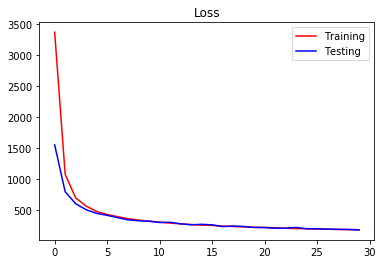

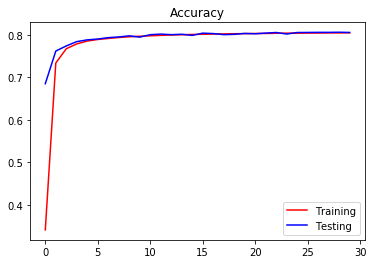

In [25]:
plt.figure(0)
plt.title("Loss")
plt.plot(hist.history['loss'], 'r', label='Training')
plt.plot(hist.history['val_loss'], 'b', label='Testing')
plt.legend()
plt.show()

plt.figure(1)
plt.title("Accuracy")
plt.plot(hist.history['acc'], 'r', label='Training')
plt.plot(hist.history['val_acc'], 'b', label='Testing')
plt.legend()
plt.show()

In [26]:
test = X_test[:20]
preds = Convolutional_AE.predict(test)
test.shape, preds.shape

((20, 28, 28, 1), (20, 28, 28, 1))

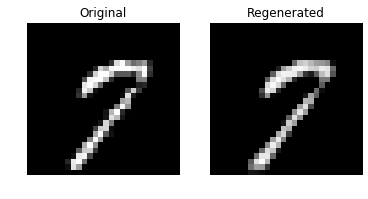

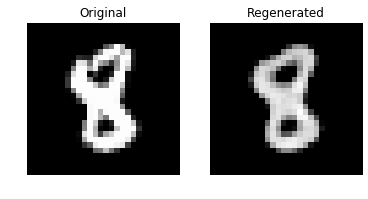

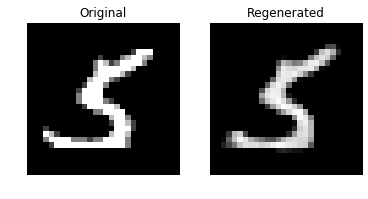

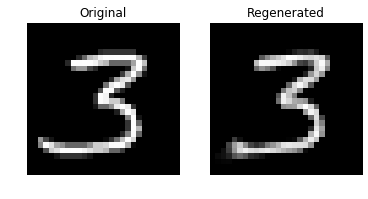

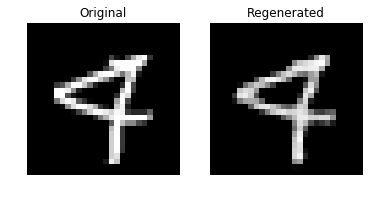

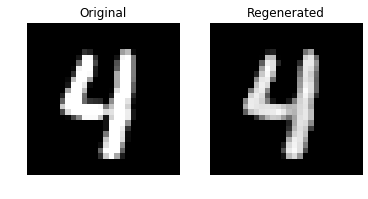

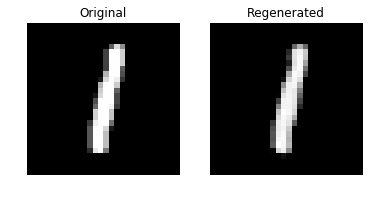

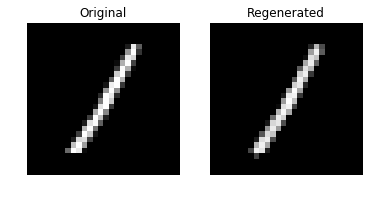

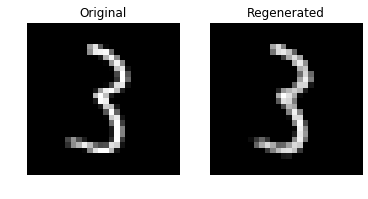

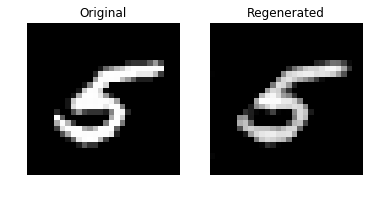

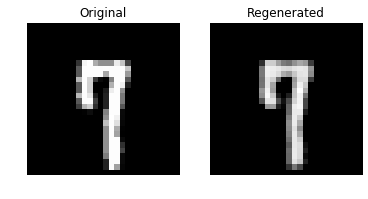

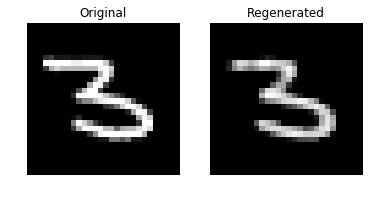

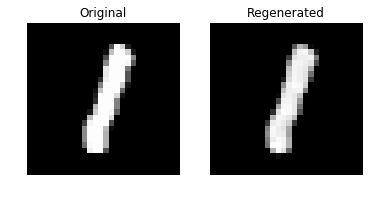

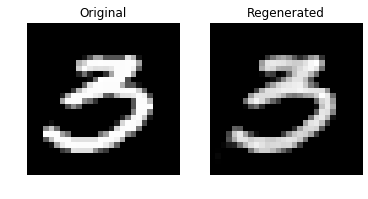

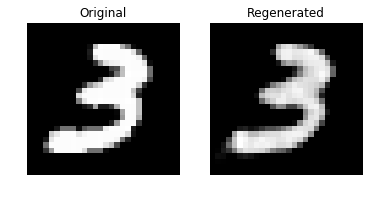

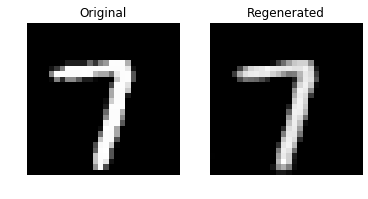

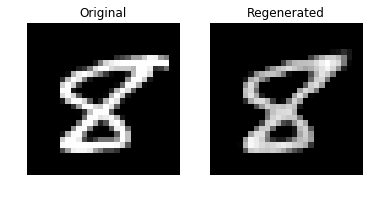

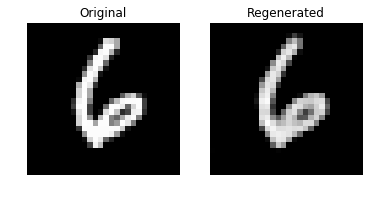

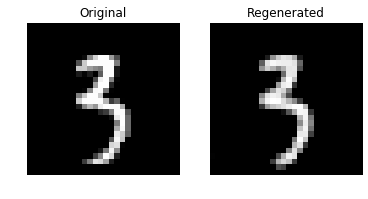

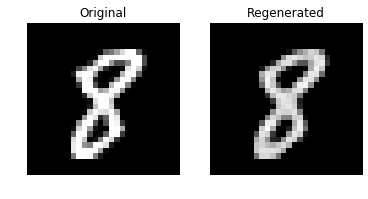

In [27]:
for i in range(test.shape[0]):
    plt.figure()
    plt.subplot(1,2,1)
    plt.title('Original')
    plt.axis('off')
    plt.imshow(test[i].reshape((28,28)), cmap='gray')
    
    plt.subplot(1,2,2)
    plt.title('Regenerated')
    plt.axis('off')
    plt.imshow(preds[i].reshape((28,28)), cmap='gray')

In [13]:
Convolutional_AE.layers

In [29]:
test = X_test[:20]
preds = Convolutional_AE.predict(test)
test.shape, preds.shape

((20, 28, 28, 1), (20, 28, 28, 1))

## Encoder

In [15]:
encoder = Model(inputs=inp, outputs=d1)
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 8)         1160      
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               205056    
Total para

In [30]:
ec = encoder.predict(test)
ec.shape

(20, 256)

## Decoder

In [28]:
decoder_input = Input(shape=(e,))
dec_layer = Convolutional_AE.layers[7](decoder_input)

for i in range(8, len(Convolutional_AE.layers)):
    dec_layer = Convolutional_AE.layers[i](dec_layer)
decoder = Model(inputs=decoder_input, outputs=dec_layer)
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 800)               205600    
_________________________________________________________________
reshape_3 (Reshape)          (None, 10, 10, 8)         0         
_________________________________________________________________
zero_padding2d_7 (ZeroPaddin (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 12, 12, 16)        1168      
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 24, 24, 16)        0         
_________________________________________________________________
zero_padding2d_8 (ZeroPaddin (None, 26, 26, 16)        0         
__________

In [32]:
dc = decoder.predict(ec)
dc.shape

(20, 28, 28, 1)